In [1]:
import numpy as np
import matplotlib.pyplot as plt
from modules.ternary_classifier import TernaryClassifier

In [2]:
def generador(n, m, rhor=1/3, rhog=1/3, rhob=1/3):
    X = np.zeros((n, m, 3))
    assert rhor + rhog + rhob == 1, "The sum of rhor, rhog, and rhob must equal 1"
    assert rhor >= 0 and rhog >= 0 and rhob >= 0, "rhor, rhog, and rhob must be non-negative"
    for i in range(n):
        for j in range(m):
            x = np.random.uniform(0, 1)
            if x < rhor:
                X[i, j, 0] = 1
            elif rhor <= x < rhor + rhog:
                X[i, j, 1] = 1
            else:
                X[i, j, 2] = 1
    return X

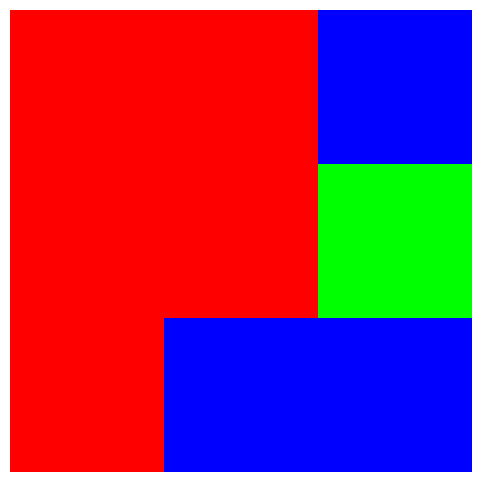

[[[1. 0. 0.]
  [1. 0. 0.]
  [0. 0. 1.]]

 [[1. 0. 0.]
  [1. 0. 0.]
  [0. 1. 0.]]

 [[1. 0. 0.]
  [0. 0. 1.]
  [0. 0. 1.]]]


In [3]:
np.random.seed(41)  # For reproducibility
ini = generador(3, 3)
classifier = TernaryClassifier(ini, 1e-2, 100, 1)
classifier.show()
print(ini)

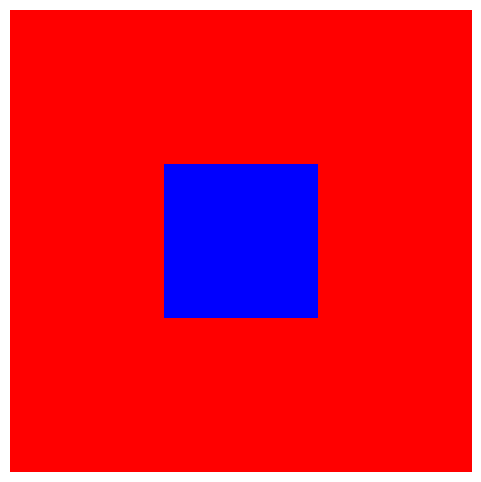

In [4]:
reds = np.array([
    [1, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
])
greens = np.zeros((3, 3))

blues = np.zeros((3, 3))
blues[1, 1] = 1
rgb_grid = np.stack([reds, greens, blues], axis=-1)

classifier = TernaryClassifier(rgb_grid, 1e-2, 100, 1)
classifier.show()

Processing pixel (0, 0) with neighbors: [(0, 0), (2, 0), (0, 2), (0, 1), (1, 0)]
neighbor_values_r: 5.0
neighbor_values_g: 0.0
neighbor_values_b: 0.0
Processing pixel (0, 1) with neighbors: [(0, 1), (2, 1), (0, 0), (0, 2), (1, 1)]
neighbor_values_r: 4.0
neighbor_values_g: 0.0
neighbor_values_b: 1.0
Processing pixel (0, 2) with neighbors: [(0, 2), (2, 2), (0, 1), (0, 0), (1, 2)]
neighbor_values_r: 5.0
neighbor_values_g: 0.0
neighbor_values_b: 0.0
Processing pixel (1, 0) with neighbors: [(1, 0), (0, 0), (1, 2), (1, 1), (2, 0)]
neighbor_values_r: 4.0
neighbor_values_g: 0.0
neighbor_values_b: 1.0
Processing pixel (1, 1) with neighbors: [(1, 1), (0, 1), (1, 0), (1, 2), (2, 1)]
neighbor_values_r: 4.0
neighbor_values_g: 0.0
neighbor_values_b: 1.0
Processing pixel (1, 2) with neighbors: [(1, 2), (0, 2), (1, 1), (1, 0), (2, 2)]
neighbor_values_r: 4.0
neighbor_values_g: 0.0
neighbor_values_b: 1.0
Processing pixel (2, 0) with neighbors: [(2, 0), (1, 0), (2, 2), (2, 1), (0, 0)]
neighbor_values_r: 

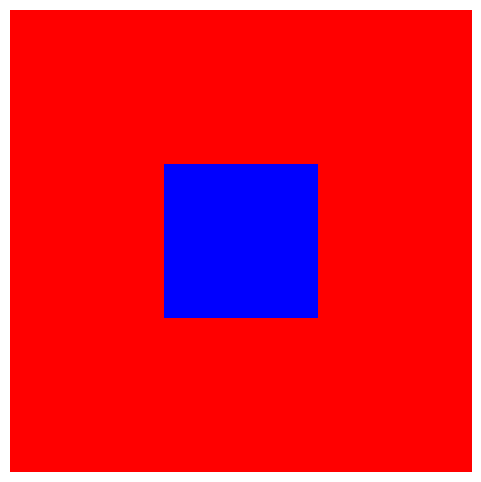

In [5]:
classifier.alternated_step()
classifier.show()

In [6]:
classifier.grid

array([[[1., 0., 0.],
        [1., 0., 0.]],

       [[1., 0., 0.],
        [0., 0., 1.]]])

In [7]:
classifier.grid

array([[[1., 0., 0.],
        [1., 0., 0.]],

       [[1., 0., 0.],
        [0., 0., 1.]]])

In [8]:
classifier.t -1


0

In [9]:
classifier._fr(1)


np.float64(1.0)

Processing pixel (0, 0) with neighbors: [(0, 0), (2, 0), (0, 2), (0, 1), (1, 0)]
neighbor_values_r: 5.0
neighbor_values_g: 0.0
neighbor_values_b: 0.0
Processing pixel (0, 1) with neighbors: [(0, 1), (2, 1), (0, 0), (0, 2), (1, 1)]
neighbor_values_r: 4.0
neighbor_values_g: 0.0
neighbor_values_b: 1.0
Processing pixel (0, 2) with neighbors: [(0, 2), (2, 2), (0, 1), (0, 0), (1, 2)]
neighbor_values_r: 5.0
neighbor_values_g: 0.0
neighbor_values_b: 0.0
Processing pixel (1, 0) with neighbors: [(1, 0), (0, 0), (1, 2), (1, 1), (2, 0)]
neighbor_values_r: 4.0
neighbor_values_g: 0.0
neighbor_values_b: 1.0
Processing pixel (1, 1) with neighbors: [(1, 1), (0, 1), (1, 0), (1, 2), (2, 1)]
neighbor_values_r: 4.0
neighbor_values_g: 0.0
neighbor_values_b: 1.0
Processing pixel (1, 2) with neighbors: [(1, 2), (0, 2), (1, 1), (1, 0), (2, 2)]
neighbor_values_r: 4.0
neighbor_values_g: 0.0
neighbor_values_b: 1.0
Processing pixel (2, 0) with neighbors: [(2, 0), (1, 0), (2, 2), (2, 1), (0, 0)]
neighbor_values_r: 

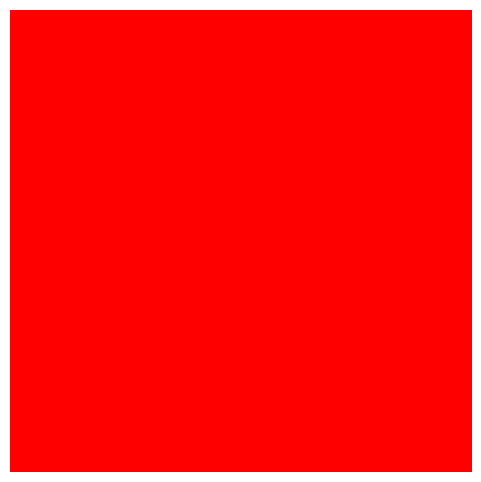

In [6]:
for _ in range(1000):
    classifier.alternated_step()
classifier.show()

In [ ]:
np.where(classifier.grid<0)

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

In [ ]:
classifier.grid

array([[[1., 0., 0.],
        [1., 0., 0.]],

       [[1., 0., 0.],
        [1., 0., 0.]]])